In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [25]:
data = pd.read_excel('data.xlsx')
X = data.iloc[:, :4].values
y = data.iloc[:, -1].values

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
m = 7000
f = 2
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:m, np.newaxis]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[m:, np.newaxis]

In [5]:
def cost_function(X, y, W):
    n = y.shape[0]
    J = np.sum((np.dot(X, W) - y)**2) / (2*m)
    return J

In [6]:
def gradient_decent(X, y, W, alpha, iterations):
    cost_history = []
    n = y.shape[0]
    
    for iteration in range(iterations):
        y_hat = np.dot(X, W)
        loss = y_hat - y
        dW = np.dot(X.T, loss) / n
        W = W - alpha*dW
        cost = cost_function(X, y, W)
        cost_history.append(cost)
        
    return W, cost_history

In [26]:
W = np.zeros((X_train.shape[1], 1))
alpha = 0.005
iter_ = 2000
newB, cost_history = gradient_decent(X_train, y_train, W, alpha, iter_)
newB

array([[454.33286521],
       [-11.83093738],
       [ -5.01409897]])

In [32]:
r2_score(np.dot(X_test, newB), y_test)

0.9063353621146258

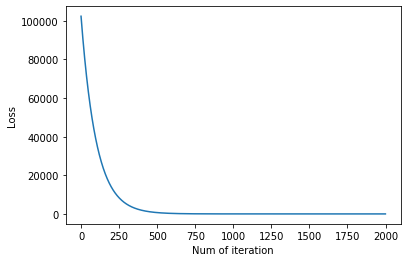

In [9]:
plt.plot(range(iter_), cost_history)
plt.xlabel('Num of iteration')
plt.ylabel('Loss')
plt.show()

# Maximum Likelihood Estimation (MLE)
___
Maximum likelihood estimation (MLE) is a technique used for estimating the parameters of a given distribution, using some observed data. For example, if a population is known to follow a “normal distribution” but the “mean” and “variance” are unknown, MLE can be used to estimate them using a limited sample of the population. MLE does that by finding particular values for the parameters (mean and variance) so that the resultant model with those parameters (mean and variance) would have generated the data.

#### **Calculating Likelihood**
$$ L(parameters | data) = \prod_{i=0}^{n} f(data_i | parameters) $$
####  **Log Likelihood**
$$ \ln(L(parameters | data)) = \sum_{i=0}^{n} \ln(f(data_i | parameters)) $$
## MLE for Linear Regression
In linear regression the trick that we do is, we take the model that we need to find, as the mean of the above stated normal distribution. Because we know how to find MLE values of a mean in a normal distribution.

But there is a special thing about this mean. That is, it’s not a fixed value. In earlier discussed normal distribution models, the mean was a fixed value (a number). But in linear regression, the mean is a function (ŷ). So you need to understand that for every x value (input) , there will be a number generated by function ŷ as the mean. So from ŷ function, we get a set of values as means. And the important thing to understand from this is that mean for each y value (each result / label) is a different. That is, mean for each y value (label) is the value predicted by our model.

$$ \hat{y} = w_0 + w_1x_1 + ... + w_dx_d $$ 
$$ \hat{y} = X_{n*d}W_{d*1} $$

We can consider this ŷ data as also in a normal distribution. But this time, their mean values will be them self since they fall along on top of the ŷ line perfectly. And so the variance of these ŷ data (predicted labels) will be 0. So, ŷ~N(XW , 0)

We have an error term called ε (residual) which is the distance between predicted value (ŷ) and actual value(y).
$$ \epsilon \sim N(0, \sigma^2) $$ 

And we know that y = ŷ + ε and y labels are normally distributed. Our aim is to estimate the best values for mean and variance of normal distribution y. Let’s get the mean and variance of y in terms of ŷ and ε normal distributions. We know the mean is termed as expectation. So let’s get the expectation of y=ŷ + ε equation in order to find the mean (expectation) of y.

**Mean:**
$$ E(y) = E(\hat{y} - \epsilon) $$
$$ E(y) = E(\hat{y}) - E(\epsilon) $$
$$ E(y) = XW - 0 $$

**Variance:**
$$ Var(y) = Var(y - \epsilon) $$
$$ Var(y) = Var(y) - Var(\epsilon) $$
$$ Var(y) = 0 + \sigma^2 $$

**Likelihood:**
$$ L(XW, \sigma^2 | x) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n * e^{\frac{\sum_{i=1}^{n}(y_i - x_iw)^2}{2\sigma^2}} $$
**Log-likelihood:**
$$ \ln(L(XW, \sigma^2 | x)) = -\frac{n}{2}\ln{(2\pi)} - \frac{n}{2}\ln{(\sigma^2)} - \frac{(Y - XW)^T(Y - XW)}{2\sigma^2}$$
$$ \frac{\partial\ln(L(XW, \sigma^2 | x))}{\partial W} = \frac{1}{2\sigma^2} (2X^TY + 2X^TXW) $$


**Optimal values of W is whene $\frac{\partial\ln(L(XW, \sigma^2 | x))}{\partial W} = 0$ :**
$$ \frac{1}{2\sigma^2} (2X^TY + 2X^TXW) = 0 $$
$$ W = \frac{X^TY}{X^TX} $$


In [34]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9144248778166375